# Base model for stock prediction

In [1]:
from tools.log_controller import LogController
from pathlib import Path

log_controller = LogController(config_path=Path('config', 'logging_config.json'))
log_controller.start()

 2025-10-26 12:10:43 - data_repository - INFO - Loaded: AAPL
 2025-10-26 12:10:43 - data_repository - INFO - Loaded: AMZN_enhanced
 2025-10-26 12:10:43 - data_repository - INFO - Loaded: AMZN_enhanced
 2025-10-26 12:10:43 - data_repository - INFO - Loaded: IBM
 2025-10-26 12:10:43 - data_repository - INFO - Loaded: AMZN
 2025-10-26 12:10:43 - data_repository - INFO - Loaded periodic stock market data for: {'AMZN', 'AMZN_enhanced', 'AAPL', 'IBM'}
 2025-10-26 12:10:43 - data_repository - INFO - Loaded: IBM
 2025-10-26 12:10:43 - data_repository - INFO - Loaded: AMZN
 2025-10-26 12:10:43 - data_repository - INFO - Loaded periodic stock market data for: {'AMZN', 'AMZN_enhanced', 'AAPL', 'IBM'}


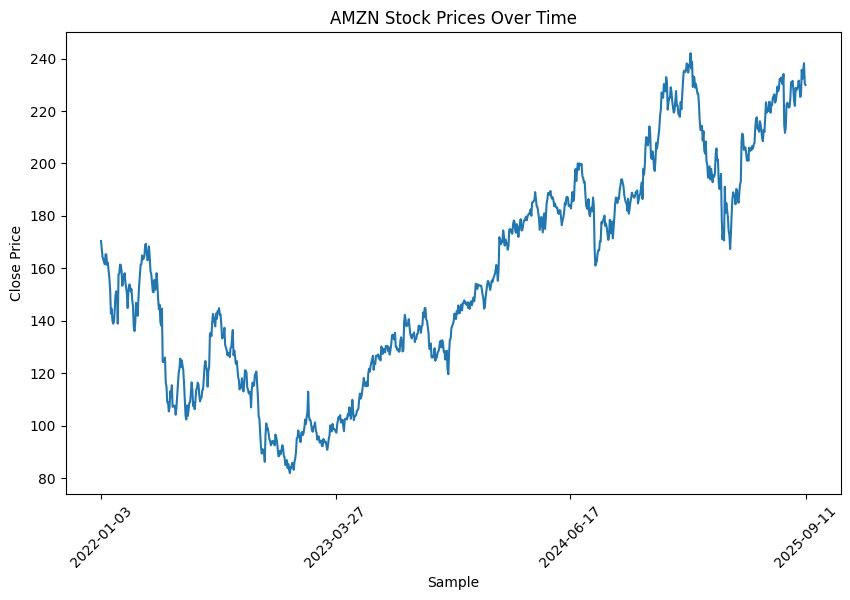

In [2]:
from core.data_repository import DataRepository
from pathlib import Path
from tools.data_visualizer import plot_stock_prices

data_repository = DataRepository(repo_path=Path('repo'))
AMZN_periodic_data = data_repository.get_dataframes()['AMZN']

plot_stock_prices(AMZN_periodic_data, column='Close', title='AMZN Stock Prices Over Time')

In [3]:
from core.data_preparator import DataPreparator

timesteps_lookback = 3

AMZN_supervised_data = DataPreparator.reformat_periodic_to_supervised_data(
    dataframe=AMZN_periodic_data,
    target_column='Close',
    t=timesteps_lookback
)

AMZN_supervised_data

 2025-10-26 12:10:45 - data_preparator - INFO - Preparing data for target column: Close, with t=3


,Close,Close_0,Close_1,Close_2
Date,,,,
2022-01-06,163.253998,164.356995,167.522003,170.404495
2022-01-07,162.554001,163.253998,164.356995,167.522003
2022-01-10,161.485992,162.554001,163.253998,164.356995
2022-01-11,165.362000,161.485992,162.554001,163.253998
2022-01-12,165.207001,165.362000,161.485992,162.554001
...,...,...,...,...
2025-09-05,232.330002,235.679993,225.990005,225.339996
2025-09-08,235.839996,232.330002,235.679993,225.990005
2025-09-09,238.240005,235.839996,232.330002,235.679993


In [4]:
from core.dataset import StockDataset
from sklearn.model_selection import train_test_split
import pandas as pd

AMZN_train_dataset, AMZN_test_dataset = train_test_split(AMZN_supervised_data, test_size=.1, shuffle=False, random_state=42)
AMZN_train_dataset, AMZN_validation_dataset = train_test_split(AMZN_train_dataset, test_size=.2, shuffle=False, random_state=42)

In [5]:
from core.data_preparator import DataPreparator
from sklearn.preprocessing import MinMaxScaler


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

AMZN_train_dataset, AMZN_validation_dataset, AMZN_test_dataset = DataPreparator.scale_datasets(
    train_dataset=AMZN_train_dataset,
    validation_dataset=AMZN_validation_dataset,
    test_dataset=AMZN_test_dataset,
    scaler_X=scaler_X,
    scaler_y=scaler_y,
    target_column='Close'
)

 2025-10-26 12:10:48 - data_preparator - INFO - Scaling datasets for target column: Close


In [6]:
display(AMZN_train_dataset.shape, AMZN_validation_dataset.shape, AMZN_test_dataset.shape)
display(AMZN_train_dataset.head(), AMZN_validation_dataset.head(), AMZN_test_dataset.head())

(664, 4)

(166, 4)

(93, 4)

,Close_0,Close_1,Close_2,Close
Date,,,,
2022-01-06,0.698401,0.725182,0.749573,0.689068
2022-01-07,0.689068,0.698401,0.725182,0.683144
2022-01-10,0.683144,0.689068,0.698401,0.674107
2022-01-11,0.674107,0.683144,0.689068,0.706905
2022-01-12,0.706905,0.674107,0.683144,0.705593


,Close_0,Close_1,Close_2,Close
Date,,,,
2024-08-29,0.752919,0.772550,0.792689,0.764089
2024-08-30,0.764089,0.752919,0.772550,0.818074
2024-09-03,0.818074,0.764089,0.752919,0.799035
2024-09-04,0.799035,0.818074,0.764089,0.774327
2024-09-05,0.774327,0.799035,0.818074,0.812913


,Close_0,Close_1,Close_2,Close
Date,,,,
2025-04-30,0.893298,0.895921,0.906837,0.868167
2025-05-01,0.868167,0.893298,0.895921,0.917076
2025-05-02,0.917076,0.868167,0.893298,0.915214
2025-05-05,0.915214,0.917076,0.868167,0.884498
2025-05-06,0.884498,0.915214,0.917076,0.873160


In [7]:
AMZN_train_dataset = StockDataset(AMZN_train_dataset)
AMZN_validation_dataset = StockDataset(AMZN_validation_dataset)
AMZN_test_dataset = StockDataset(AMZN_test_dataset)

 2025-10-26 12:10:48 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-26 12:10:48 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-26 12:10:48 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-26 12:10:48 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-26 12:10:48 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close


In [8]:
# from models.lstm_model import LSTMStockModel

# best_params, best_value = LSTMStockModel.optimize_hyperparameters(
#     train_dataset=AMZN_train_dataset,
#     validation_dataset=AMZN_validation_dataset,
#     feature_number=timesteps_lookback,
#     ticker='AMZN',
#     input_dim=1,
#     output_dim=1,
#     n_trials=20
# )
# print(f'Best hyperparameters: {best_params}, Best MSE Loss: {best_value}')

In [9]:
from models.lstm_model import LSTMStockModel

AMZN_base_model = LSTMStockModel(
    id='base_amzn_model',
    ticker='AMZN',
    input_dim=1,
    hidden_dim=27,
    layer_dim=1,
    output_dim=1
)

 2025-10-26 12:10:48 - model - INFO - Model(id=base_amzn_model,
ticker=('AMZN',),
input_dimension=1),
hidden_dimension=27,
layer_dimension=1,
output_dimension=1)


/home/emdablju/Documents/projects/kalman_stock_prediction/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
from torch.optim import Adam
from torch.nn import MSELoss

optimizer = Adam(AMZN_base_model.parameters(), lr=0.001)
loss_function = MSELoss()

In [11]:
from torch.utils.data import DataLoader
import torch
import numpy as np


AMZN_train_data_loader = DataLoader(AMZN_train_dataset, batch_size=16, shuffle=False)
AMZN_validation_data_loader = DataLoader(AMZN_validation_dataset, batch_size=10, shuffle=False)
epochs = 20
feature_number = AMZN_train_dataset.X.shape[1]

train_mse_list, val_mse_list, train_r2_list, val_r2_list, val_actuals, val_predictions, val_errors = AMZN_base_model.perform_training(
    train_loader=AMZN_train_data_loader,
    validation_loader=AMZN_validation_data_loader,
    optimizer=optimizer,
    loss_function=loss_function,
    epochs=epochs,
    feature_number=feature_number
)

 2025-10-26 12:10:50 - model - INFO - Epoch [1/20]
 2025-10-26 12:10:50 - model - INFO - Train MSE: 0.130023, R2: -0.9793
 2025-10-26 12:10:50 - model - INFO - Validation MSE: 0.423229, R2: -14.6140
 2025-10-26 12:10:50 - model - INFO - Train MSE: 0.130023, R2: -0.9793
 2025-10-26 12:10:50 - model - INFO - Validation MSE: 0.423229, R2: -14.6140
 2025-10-26 12:10:50 - model - INFO - Epoch [2/20]
 2025-10-26 12:10:50 - model - INFO - Train MSE: 0.061055, R2: 0.0706
 2025-10-26 12:10:50 - model - INFO - Validation MSE: 0.224180, R2: -7.2706
 2025-10-26 12:10:50 - model - INFO - Epoch [2/20]
 2025-10-26 12:10:50 - model - INFO - Train MSE: 0.061055, R2: 0.0706
 2025-10-26 12:10:50 - model - INFO - Validation MSE: 0.224180, R2: -7.2706
 2025-10-26 12:10:50 - model - INFO - Epoch [3/20]
 2025-10-26 12:10:50 - model - INFO - Train MSE: 0.060730, R2: 0.0755
 2025-10-26 12:10:50 - model - INFO - Validation MSE: 0.193530, R2: -6.1398
 2025-10-26 12:10:50 - model - INFO - Epoch [3/20]
 2025-10-26

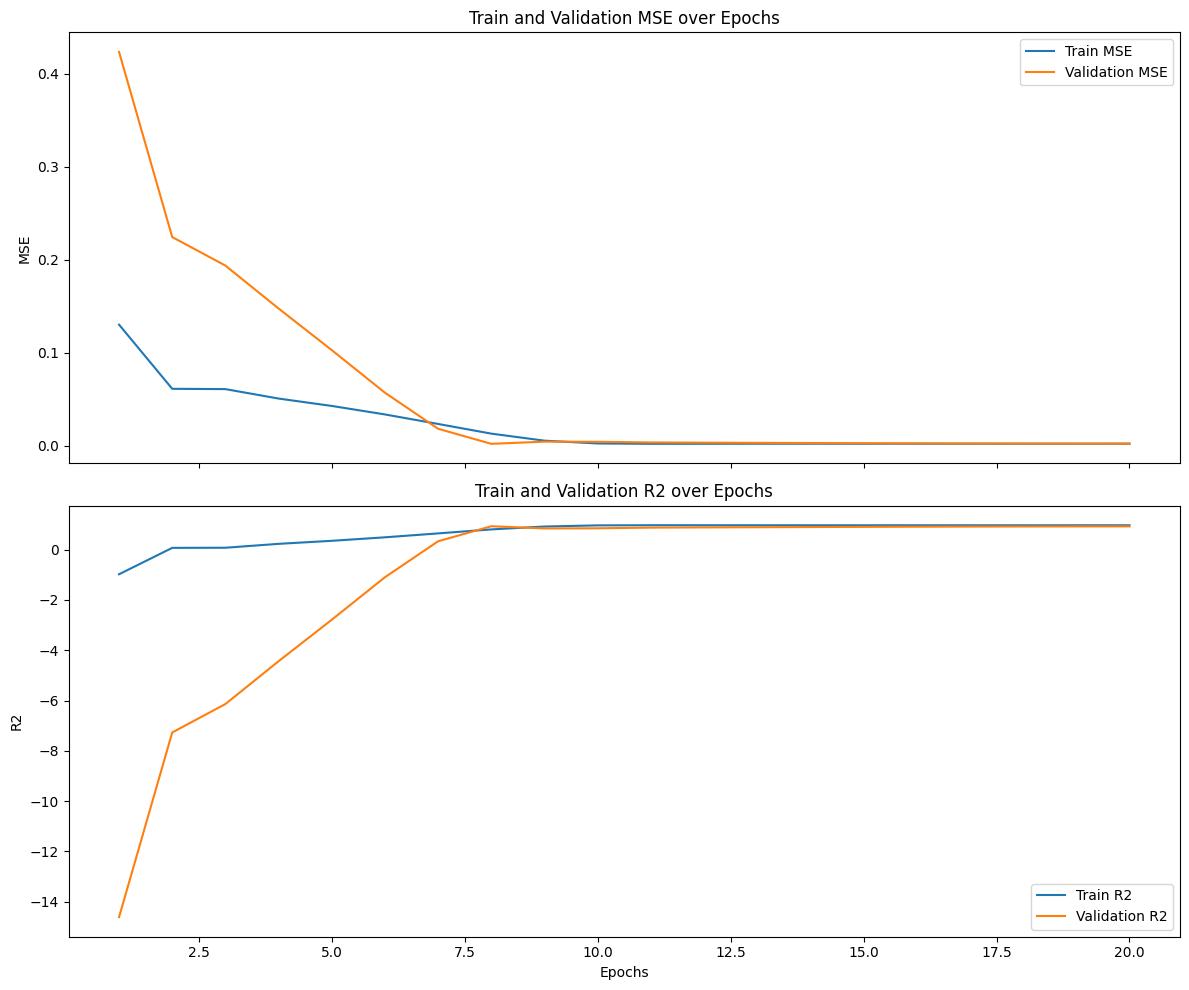

In [12]:
from tools.data_visualizer import plot_performance_metrics

plot_performance_metrics(train_mse_list, val_mse_list, train_r2_list, val_r2_list, epochs)

In [13]:
AMZN_test_data_loader = DataLoader(AMZN_test_dataset, batch_size=10, shuffle=False)

actuals, predictions, errors = AMZN_base_model.evaluate(
    test_loader=AMZN_test_data_loader,
    loss_function=loss_function,
    scaler_y=scaler_y,
    feature_number=timesteps_lookback
)

Test RMSE: 0.0388
Test Loss (RMSE) on original scale: 4.5925


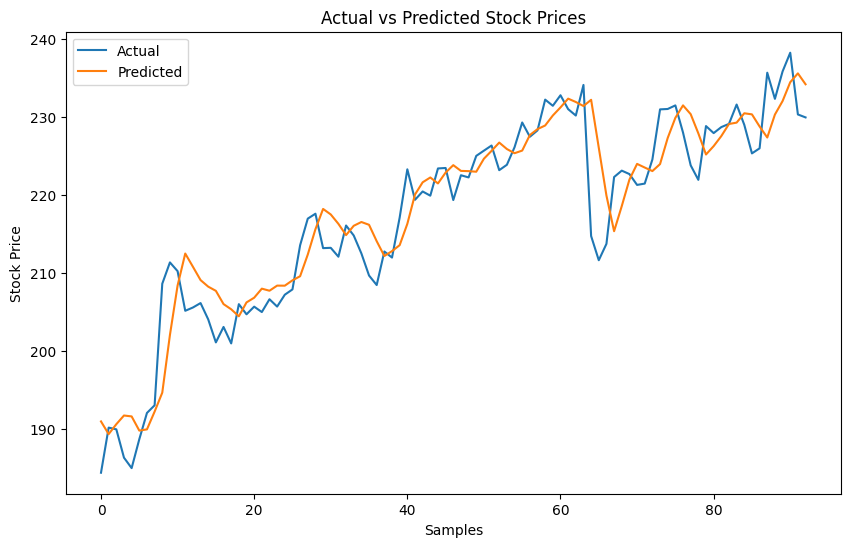

In [14]:
from tools.data_visualizer import plot_predictions

plot_predictions(actuals, predictions)

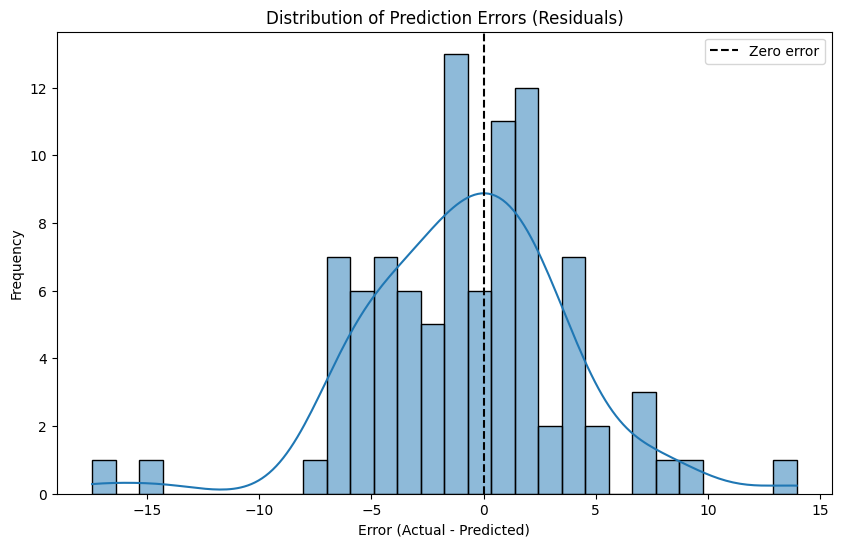

In [15]:
from tools.data_visualizer import plot_errors

plot_errors(errors)